In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1st look at the data

In [133]:
df = pd.read_excel('Assignment-2024-training-data-set.xlsx')

In [134]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000009,unas,-,INT,2,0,200,0,111111.1072,254,...,4,8,0,0,0,13,8,0,Analysis,1
1,0.000009,unas,-,INT,2,0,200,0,111111.1072,254,...,2,7,0,0,0,11,7,0,Analysis,1
2,0.000008,unas,-,INT,2,0,200,0,125000.0003,254,...,2,7,0,0,0,5,7,0,Analysis,1
3,0.000008,unas,-,INT,2,0,200,0,125000.0003,254,...,2,8,0,0,0,7,8,0,Analysis,1
4,0.000008,unas,-,INT,2,0,200,0,125000.0003,254,...,6,8,0,0,0,23,8,0,Analysis,1


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145854 entries, 0 to 145853
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                145854 non-null  float64
 1   proto              145854 non-null  object 
 2   service            145854 non-null  object 
 3   state              145854 non-null  object 
 4   spkts              145854 non-null  int64  
 5   dpkts              145854 non-null  int64  
 6   sbytes             145854 non-null  int64  
 7   dbytes             145854 non-null  int64  
 8   rate               145854 non-null  float64
 9   sttl               145854 non-null  int64  
 10  dttl               145854 non-null  int64  
 11  sload              145854 non-null  float64
 12  dload              145854 non-null  float64
 13  sloss              145854 non-null  int64  
 14  dloss              145854 non-null  int64  
 15  sinpkt             145854 non-null  float64
 16  di

In [136]:
print(df.shape[0])
print(df.shape[1])

145854
44


# Irrelevant attributes

## rate
no info on the data

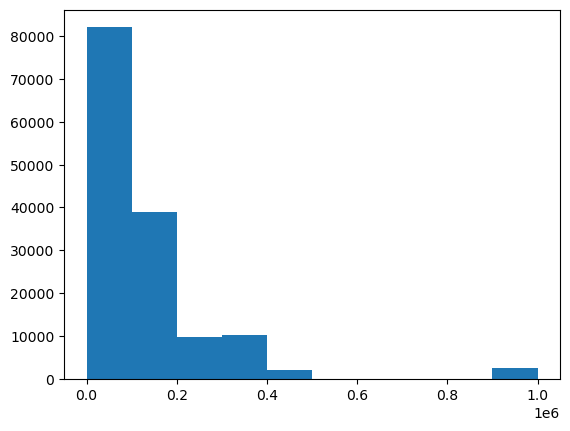

In [137]:
plt.hist(df.rate);
# have no idea

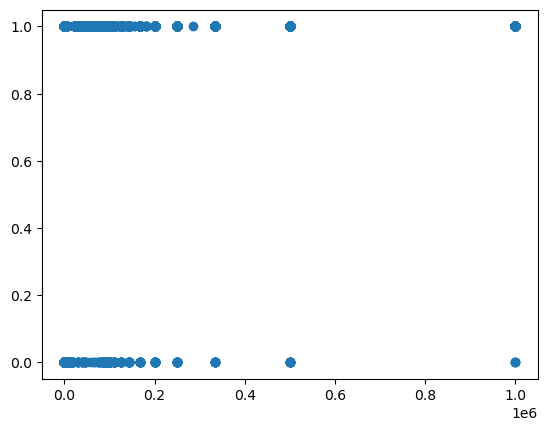

In [138]:
plt.scatter(df.rate,df.label);

## protocol

In [139]:
df.proto.unique()
# i just dont think it useful

array(['unas', 'ib', 'ospf', 'sctp', 'gmtp', 'scps', 'tcp', 'smp', 'isis',
       'ipnip', 'st2', 'bbn-rcc', 'igp', 'irtp', '3pc', 'tp++', 'il',
       'sdrp', 'skip', 'pup', 'trunk-1', 'sat-mon', 'cpnx', 'ipv6',
       'ipv6-frag', 'swipe', 'secure-vmtp', 'narp', 'ipv6-no',
       'ipv6-opts', 'mtp', 'any', 'gre', 'nvp', 'leaf-1', 'argus', 'prm',
       'xns-idp', 'rdp', 'mfe-nsp', 'ipv6-route', 'sat-expak', 'ggp',
       'ip', 'pvp', 'chaos', 'egp', 'leaf-2', 'netblt', 'idpr', 'ddp',
       'rsvp', 'i-nlsp', 'ippc', 'etherip', 'pri-enc', 'dgp', 'qnx',
       'nsfnet-igp', 'tcf', 'pgm', 'zero', 'iso-ip', 'vmtp', 'ttp',
       'ipx-n-ip', 'vrrp', 'crtp', 'crudp', 'emcon', 'ddx', 'xnet', 'uti',
       'trunk-2', 'iso-tp4', 'compaq-peer', 'l2tp', 'ipcv', 'tlsp',
       'wb-mon', 'sm', 'wb-expak', 'mux', 'eigrp', 'larp', 'fc',
       'merit-inp', 'pnni', 'idpr-cmtp', 'idrp', 'a/n', 'mhrp', 'rvd',
       'cftp', 'vines', 'iatp', 'visa', 'cphb', 'ptp', 'ax.25',
       'sccopmce', 'kryptolan

## service

In [140]:
df.service.unique()

array(['-', 'http', 'smtp', 'ftp', 'irc', 'pop3', 'ftp-data', 'dhcp',
       'ssl', 'dns', 'snmp', 'ssh', 'radius'], dtype=object)

## state

In [141]:
df.state.unique()

array(['INT', 'CON', 'FIN', 'REQ', 'RST', 'ECO', 'PAR', 'URN', 'no'],
      dtype=object)

## attack_cat: normal  = 1 ?

In [142]:
df.attack_cat.unique()

array(['Analysis', 'Backdoor', 'Exploits', 'Fuzzers', 'Generic', 'Normal',
       'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [143]:
print(df.label.loc[df.attack_cat == "Normal"].unique())
#yep
print(df.label.loc[df.attack_cat != "Normal"].unique())

[0]
[1]


# Missing entries

In [144]:
df.isnull().sum()  #couldn't find from function

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [145]:
#check unique value
for i in range(len(df.columns)):
    print(df.columns[i])
    print(pd.unique(df.iloc[:,i]))  

dur
[9.00000e-06 8.00000e-06 7.00000e-06 ... 8.73450e+00 6.05943e-01
 2.58671e-01]
proto
['unas' 'ib' 'ospf' 'sctp' 'gmtp' 'scps' 'tcp' 'smp' 'isis' 'ipnip' 'st2'
 'bbn-rcc' 'igp' 'irtp' '3pc' 'tp++' 'il' 'sdrp' 'skip' 'pup' 'trunk-1'
 'sat-mon' 'cpnx' 'ipv6' 'ipv6-frag' 'swipe' 'secure-vmtp' 'narp'
 'ipv6-no' 'ipv6-opts' 'mtp' 'any' 'gre' 'nvp' 'leaf-1' 'argus' 'prm'
 'xns-idp' 'rdp' 'mfe-nsp' 'ipv6-route' 'sat-expak' 'ggp' 'ip' 'pvp'
 'chaos' 'egp' 'leaf-2' 'netblt' 'idpr' 'ddp' 'rsvp' 'i-nlsp' 'ippc'
 'etherip' 'pri-enc' 'dgp' 'qnx' 'nsfnet-igp' 'tcf' 'pgm' 'zero' 'iso-ip'
 'vmtp' 'ttp' 'ipx-n-ip' 'vrrp' 'crtp' 'crudp' 'emcon' 'ddx' 'xnet' 'uti'
 'trunk-2' 'iso-tp4' 'compaq-peer' 'l2tp' 'ipcv' 'tlsp' 'wb-mon' 'sm'
 'wb-expak' 'mux' 'eigrp' 'larp' 'fc' 'merit-inp' 'pnni' 'idpr-cmtp'
 'idrp' 'a/n' 'mhrp' 'rvd' 'cftp' 'vines' 'iatp' 'visa' 'cphb' 'ptp'
 'ax.25' 'sccopmce' 'kryptolan' 'micp' 'ipip' 'aes-sp3-d' 'ifmp' 'snp'
 'sprite-rpc' 'ipcomp' 'br-sat-mon' 'encap' 'srp' 'fire' 'aris' 

## duration = 0 ?
i dont think duration of time saction should be zero

In [146]:
# check how much are there
df.dur[df.dur == 0].count()
#small amount

1333

In [147]:
temp = ["dur","sbytes","dbytes"]
df[temp][df.dur == 0][(df.sbytes != 0) | (df.dbytes != 0)].count()

C:\Users\Asus\AppData\Local\Temp\ipykernel_27092\3797832464.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[temp][df.dur == 0][(df.sbytes != 0) | (df.dbytes != 0)].count()


dur       1333
sbytes    1333
dbytes    1333
dtype: int64

In [148]:
# decide to replace with mean
df.dur =  df.dur.replace(0,df.dur.mean())
df.dur[df.dur == 0].count()

0

## rate 
the value shouldn't be zero
going to remove anyway

In [149]:
df.rate[df.rate == 0].count()

1565

## sbytes
shouldn't be zero unless the thier no data transfer from the  source to destination

In [150]:
df.sbytes[df.sbytes == 0].count()

0

##  dbytes
shouldn't be zero unless the thier no data transfer from the  destination to source

In [151]:
df.dbytes[df.dbytes == 0].count()


69820

## sload and dload
bps should be more than 0 except no data transfer

In [152]:
df.sload[(df.sload == 0) & (df.sbytes != 0)].count()
# Since their always a data transfer from the variable sbyte the value should not be zero
# low amount of data missing replace with mean

1572

In [153]:
df.sload =  df.sload.replace(0,df.sload.mean())
df.sload[df.sload == 0].count()

0

In [154]:
df.dload[df.dload == 0].count()

69827

In [155]:
#there should be 7 missing value
df.dload[(df.dload == 0) & (df.dbytes != 0)].count()

7

In [156]:
#replace them with mean
df.dload[(df.dload == 0) & (df.dbytes != 0)] = df.dload[(df.dload == 0) & (df.dbytes != 0)].replace(0,df.dload.mean())
df.dload[df.dload == 0].count() 

C:\Users\Asus\AppData\Local\Temp\ipykernel_27092\1680505019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dload[(df.dload == 0) & (df.dbytes != 0)] = df.dload[(df.dload == 0) & (df.dbytes != 0)].replace(0,df.dload.mean())


69820

## swin and dwin have low unique value?
apon reseach the number could be zero.

[  0 255]


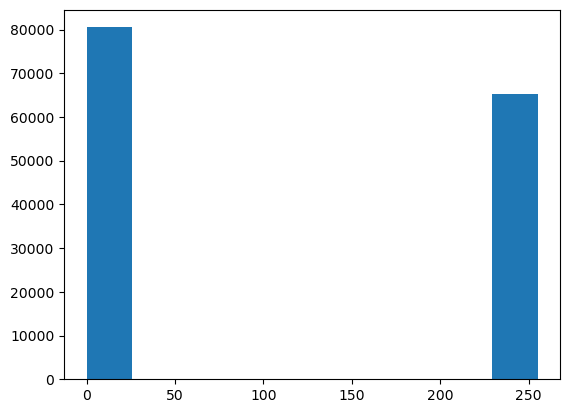

In [157]:
print(df.swin.unique())
plt.hist(df.swin);

[  0 255 244  70]


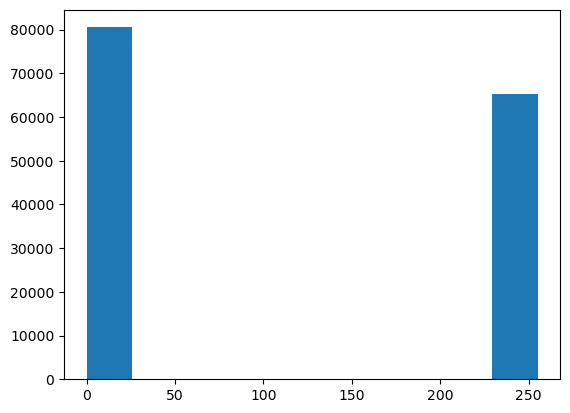

In [158]:
print(df.dwin.unique())
plt.hist(df.dwin);

## sjit and djit

In [159]:
print(df.sjit.loc[df.sjit == 0].count())
print(df.sjit.loc[df.sjit != 0].count())
# apon research the data can be zero

74931
70923


In [160]:
print(df.djit.loc[df.djit == 0].count())
print(df.djit.loc[df.djit != 0].count())
# apon research the data can be zero

77378
68476


# duplicate row

In [161]:
print(df.shape[0])
print(df.duplicated(keep=False).sum()) #there are lots of duplicate data

145854
65753


In [162]:
df.loc[(df.duplicated(keep=False))].sort_values("dur")

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
85015,0.000001,udp,dns,INT,2,0,114,0,1.000000e+06,254,...,14,31,0,0,0,14,31,0,Generic,1
73422,0.000001,udp,dns,INT,2,0,114,0,1.000000e+06,254,...,16,26,0,0,0,16,26,0,Generic,1
33275,0.000001,unas,-,INT,2,0,200,0,1.000000e+06,254,...,1,4,0,0,0,3,3,0,Exploits,1
64237,0.000001,udp,dns,INT,2,0,114,0,1.000000e+06,254,...,8,24,0,0,0,8,24,0,Generic,1
33236,0.000001,snp,-,INT,2,0,200,0,1.000000e+06,254,...,3,8,0,0,0,4,7,0,Exploits,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134022,59.996574,arp,-,INT,2,0,92,0,1.666800e-02,0,...,2,2,0,0,0,2,2,1,Normal,0
134023,59.996574,arp,-,INT,2,0,92,0,1.666800e-02,0,...,2,2,0,0,0,2,2,1,Normal,0
134021,59.996574,arp,-,INT,2,0,92,0,1.666800e-02,0,...,2,2,0,0,0,2,2,1,Normal,0
136117,59.996758,tcp,http,CON,818,5254,35660,7085342,1.011888e+02,62,...,2,10,0,0,6,5,2,0,Reconnaissance,1


In [163]:
# cal the ratio
df.duplicated().sum()/df.shape[0]
# 38  percent duplicate data
# since it is the log data of im going to keep all the duplicate

0.3883746760459089

# duplicate column

## sload and sbyte Dload and dbyte

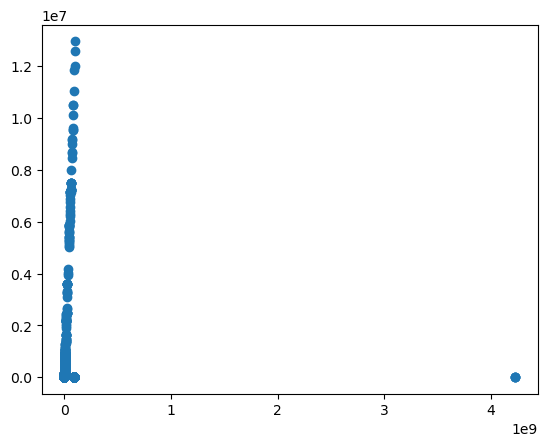

In [164]:
plt.scatter(df.sload*df.dur, df.sbytes);

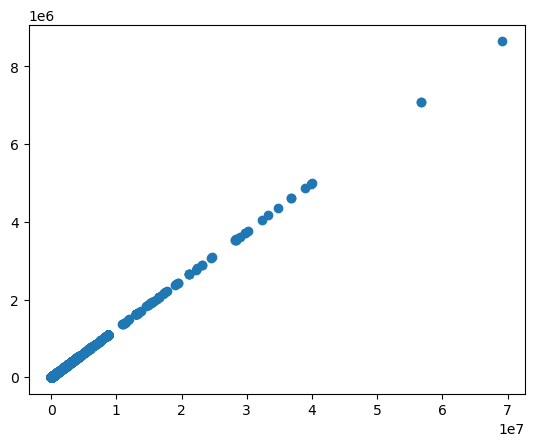

In [165]:
plt.scatter(df.dload*df.dur, df.dbytes);

## sttl and dttl

In [166]:
df.dttl.head()

0    0
1    0
2    0
3    0
4    0
Name: dttl, dtype: int64

In [167]:
df.sttl.head()
# no they not the same

0    254
1    254
2    254
3    254
4    254
Name: sttl, dtype: int64

## synack and sckdat and tcprtt

In [168]:
df.synack.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: synack, dtype: float64

In [169]:
df.ackdat.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ackdat, dtype: float64

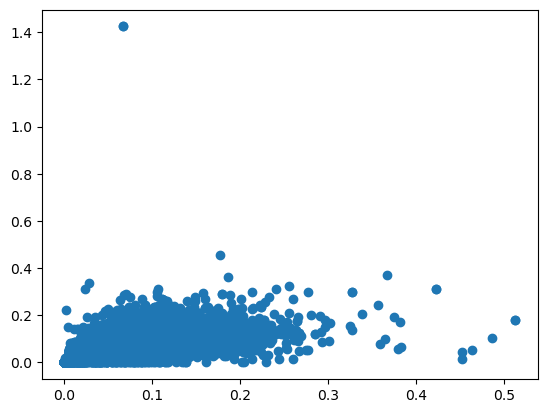

In [170]:
plt.scatter(df.synack,df.ackdat);
# look like they are not the same data

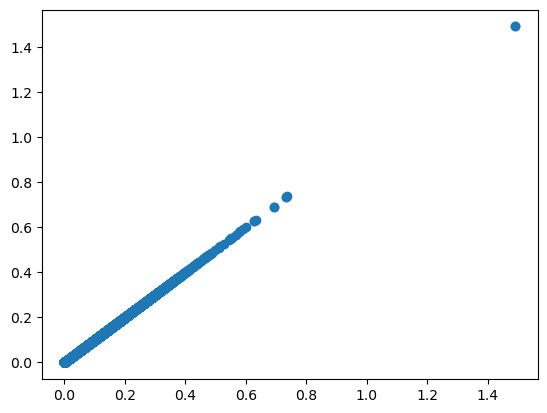

In [171]:
temp = df.synack + df.ackdat
plt.scatter(temp, df.tcprtt);
#yep they are the same data
# remove 

## is_ftp_login and ct_ftp_cmd
the feature is ftp login should be binary but have the same unique value as ct_ftp_cmd

In [172]:
pd.unique(df.is_ftp_login)

array([0, 1, 4, 2], dtype=int64)

True

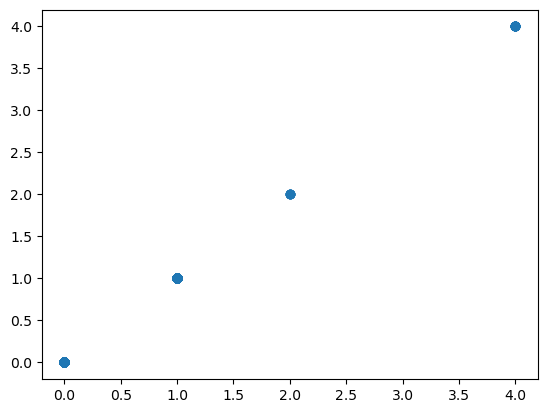

In [173]:
# check if that true
plt.scatter(df.is_ftp_login, df.ct_ftp_cmd);
#look like it 
df.is_ftp_login.equals(df.ct_ftp_cmd)
# this comfirm it
# is_ftp_login should be drop since from the feature description the data should hold binary

# Data type

## sbytes and dbytes
do every file have to have a full byte?
the ans is yes wow

# Feature/Attribute selection

remove tcprtt = df.synack + df.ackdat
Sload > we have duration and sbyte
Dload > we have duration and dbyte
attack_cat

In [174]:
drop_column = ["tcprtt","sload", "dload","attack_cat","is_ftp_login"]
df = df.drop(columns= drop_column, errors ='ignore')

#  Scaling and standardisation

In [175]:
#check unique value
for i in range(len(df.columns)):
    print(df.columns[i], df.iloc[:,i].min(), df.iloc[:,i].max())


dur 1e-06 59.999046
proto 3pc zero
service - ssl
state CON no
spkts 1 9616
dpkts 0 6494
sbytes 28 12965233
dbytes 0 8645430
rate 0.0 1000000.003
sttl 0 255
dttl 0 254
sloss 0 4803
dloss 0 3246
sinpkt 0.0 84371.496
dinpkt 0.0 52124.264
sjit 0.0 1181164.235
djit 0.0 289388.2697
swin 0 255
stcpb 0 4294958913
dtcpb 0 4294880419
dwin 0 255
synack 0.0 0.513125
ackdat 0.0 1.424061
smean 28 1504
dmean 0 1458
trans_depth 0 172
response_body_len 0 6558056
ct_srv_src 1 63
ct_state_ttl 0 6
ct_dst_ltm 1 51
ct_src_dport_ltm 1 51
ct_dst_sport_ltm 1 46
ct_dst_src_ltm 1 65
ct_ftp_cmd 0 4
ct_flw_http_mthd 0 30
ct_src_ltm 1 60
ct_srv_dst 1 62
is_sm_ips_ports 0 1
label 0 1


In [176]:
from sklearn.preprocessing import MinMaxScaler
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns
scaler = MinMaxScaler()
scaler = scaler.fit(df.loc[:, ~df.columns.isin(categorical_columns)])
df.loc[:, ~df.columns.isin(categorical_columns)]= scaler.transform(df.loc[:, ~df.columns.isin(categorical_columns)])

In [177]:
#check unique value
for i in range(len(df.columns)):
    print(df.columns[i], df.iloc[:,i].min(), df.iloc[:,i].max())

dur 0.0 0.9999999999999999
proto 3pc zero
service - ssl
state CON no
spkts 0.0 0.9999999999999999
dpkts 0.0 1.0
sbytes 0.0 1.0
dbytes 0.0 1.0
rate 0.0 1.0
sttl 0.0 1.0
dttl 0.0 1.0
sloss 0.0 1.0
dloss 0.0 1.0
sinpkt 0.0 1.0
dinpkt 0.0 1.0
sjit 0.0 1.0
djit 0.0 1.0
swin 0 1
stcpb 0.0 1.0
dtcpb 0.0 0.9999999999999999
dwin 0.0 1.0
synack 0.0 1.0
ackdat 0.0 0.9999999999999999
smean 0.0 1.0
dmean 0.0 0.9999999999999999
trans_depth 0.0 1.0
response_body_len 0.0 1.0
ct_srv_src 0.0 1.0
ct_state_ttl 0.0 1.0
ct_dst_ltm 0.0 1.0
ct_src_dport_ltm 0.0 1.0
ct_dst_sport_ltm 0.0 1.0000000000000002
ct_dst_src_ltm 0.0 1.0
ct_ftp_cmd 0.0 1.0
ct_flw_http_mthd 0.0 1.0
ct_src_ltm 0.0 1.0
ct_srv_dst 0.0 1.0
is_sm_ips_ports 0 1
label 0 1


#  Data imbalance

In [178]:
# check the amount of normal and attack data
print(df.label.loc[df.label == 0].count())
print(df.label.loc[df.label == 1].count())
# there are data imbalance in the data 

38777
107077


In [179]:
print(df.label.loc[df.label == 1].count()/df.shape[0])
#the attack data account for 73 percent of the dataset

0.734138247836878


In [180]:
from sklearn.utils import resample
df_major = df[df.label == 1]
df_minor = df[df.label == 0]

df_major_downs = resample(df_major, replace = True, n_samples = df_minor.shape[0], random_state = 5601)
df = pd.concat([df_minor, df_major_downs])
df.reset_index(inplace=True, drop=True)

# Feature engineering

In [181]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore')
encoder = encoder.fit(df[categorical_columns])
one_hot_encoded = encoder.transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1 )
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77554 entries, 0 to 77553
Columns: 191 entries, dur to state_no
dtypes: float64(188), int64(3)
memory usage: 113.0 MB


# Training, Validation, and Test Sets

In [182]:
y = df_encoded.label
X = df_encoded.loc[:,df_encoded.columns != "label"]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77554 entries, 0 to 77553
Columns: 190 entries, dur to state_no
dtypes: float64(188), int64(2)
memory usage: 112.4 MB


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5601)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5601) 

In [184]:
print(X_train.info())
print(X_val.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 46532 entries, 52549 to 76962
Columns: 190 entries, dur to state_no
dtypes: float64(188), int64(2)
memory usage: 67.8 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 15511 entries, 69587 to 30489
Columns: 190 entries, dur to state_no
dtypes: float64(188), int64(2)
memory usage: 22.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 15511 entries, 20303 to 39932
Columns: 190 entries, dur to state_no
dtypes: float64(188), int64(2)
memory usage: 22.6 MB
None


In [185]:
# Save the data to arff
import arff
#training
#join file back
train_df = pd.concat([X_train,y_train],axis = 1)
print(train_df.info())
arff.dump('Training.arff'
      , train_df.values
      ,relation='relation name'
      , names=train_df.columns)

#validation
val_df = pd.concat([X_val,y_val],axis = 1)
print(val_df.info())
arff.dump('Validation.arff'
      , val_df.values
      ,relation='relation name'
      , names=val_df.columns)

#testing
test_df = pd.concat([X_test,y_test],axis = 1)
print(test_df.info())
arff.dump('Test.arff'
      , test_df.values
      ,relation='relation name'
      , names=test_df.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 46532 entries, 52549 to 76962
Columns: 191 entries, dur to label
dtypes: float64(188), int64(3)
memory usage: 68.2 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 15511 entries, 69587 to 30489
Columns: 191 entries, dur to label
dtypes: float64(188), int64(3)
memory usage: 22.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 15511 entries, 20303 to 39932
Columns: 191 entries, dur to label
dtypes: float64(188), int64(3)
memory usage: 22.7 MB
None


#  k-NN

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [187]:
y_pred_knn = knn.predict(X_test)

In [188]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[7665  122]
 [  57 7667]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7787
           1       0.98      0.99      0.99      7724

    accuracy                           0.99     15511
   macro avg       0.99      0.99      0.99     15511
weighted avg       0.99      0.99      0.99     15511



#  Naive Bayes

In [189]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [190]:
y_pred_nb = nb.predict(X_test)

In [191]:
confusion_matrix(y_test, y_pred_nb)

array([[7787,    0],
       [6139, 1585]], dtype=int64)

In [192]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      7787
           1       1.00      0.21      0.34      7724

    accuracy                           0.60     15511
   macro avg       0.78      0.60      0.53     15511
weighted avg       0.78      0.60      0.53     15511



#  Decision Trees

In [193]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=5601)
tree = tree.fit(X_train, y_train)

In [194]:
y_pred_tree = tree.predict(X_test)

In [195]:
confusion_matrix(y_test, y_pred_tree)

array([[7714,   73],
       [  76, 7648]], dtype=int64)

In [196]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7787
           1       0.99      0.99      0.99      7724

    accuracy                           0.99     15511
   macro avg       0.99      0.99      0.99     15511
weighted avg       0.99      0.99      0.99     15511



# Cross validation

In [197]:
from sklearn.model_selection import cross_val_score

## knn

In [198]:
n_neighbors_list = [3, 5, 10, 20, 50,100,200,500,1000]
knns_cv_result = []

for i in n_neighbors_list:
    
    model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(model, X_val,y_val,cv = 5)
    knns_cv_result.append({
        "n_neighbors": i,
        "Mean CV Score": scores.mean(),
        "Std CV Score": scores.std()
    })
score_knns_cv = pd.DataFrame(knns_cv_result)

In [199]:
score_knns_cv

,n_neighbors,Mean CV Score,Std CV Score
0,3,0.988653,0.002052
1,5,0.989040,0.001966
2,10,0.988137,0.002450
3,20,0.987493,0.002739
4,50,0.986397,0.002700
5,100,0.984720,0.002312
6,200,0.972213,0.001746
7,500,0.967507,0.007513
8,1000,0.960286,0.002156


## Naive Bayes

In [200]:
nb_cv = GaussianNB()
scores_nb_cv= cross_val_score(nb_cv, X_val,y_val,cv = 5)
scores_nb_cv.mean()

0.6027334459092333

## Desiction Tree

In [201]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [1,2,5,10,20,50,100,200,500,1000],
    'min_samples_leaf': [1,2,5,10,20,50,100,200,500,1000],
    'min_samples_split': [2,5,10,20,50,100,200,500,1000],
}
tree = DecisionTreeClassifier(random_state=5601)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(X_val, y_val)

# Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
best accuracy 0.9893623254715127
DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=5601)


## compare all of the best 3 models

In [202]:
result_cv = []
knn5 =KNeighborsClassifier(n_neighbors= 5)
score_knn5_cv = cross_val_score(knn5, X_val,y_val,cv = 5)
result_cv.append({
    "Model": "5nn",
    "mean CV score" : score_knn5_cv.mean(),
    "std CV score" : score_knn5_cv.std()
})
result_cv.append({
    "Model": "nb",
    "mean CV score" : scores_nb_cv.mean(),
    "std CV score" : scores_nb_cv.std()
})
btree =DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=5601)
score_btree_cv = cross_val_score(btree, X_val,y_val,cv = 5)
result_cv.append({
    "Model": "btree",
    "mean CV score" : score_btree_cv.mean(),
    "std CV score" : score_btree_cv.std()
})
cv_df = pd.DataFrame(result_cv)
cv_df

,Model,mean CV score,std CV score
0,5nn,0.989040,0.001966
1,nb,0.602733,0.005904
2,btree,0.989362,0.001619


# Classifier comparison

In [203]:
# confusion martrix
# recreate best models from each knn
knn5 =KNeighborsClassifier(n_neighbors= 5)
knn5 = knn5.fit(X_train,y_train)
y_pred_5nn =  knn5.predict(X_test)
print("5nn")
print(confusion_matrix(y_test, y_pred_5nn))

#nb have only one model
print("nb")
print(confusion_matrix(y_test, y_pred_nb))

# recreate best models from each decision tree
btree =DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=5601)
btree = btree.fit(X_train,y_train)
y_pred_btree =  btree.predict(X_test)
print("btree")
print(confusion_matrix(y_test, y_pred_btree))

5nn
[[7657  130]
 [  49 7675]]
nb
[[7787    0]
 [6139 1585]]
btree
[[7678  109]
 [  35 7689]]


In [204]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
result = []
result.append({
        "Model": "5nn",
        "Accuracy": accuracy_score(y_test,y_pred_5nn),
        "Precision": precision_score(y_test,y_pred_5nn),
        "F1" :f1_score(y_test,y_pred_knn)
        })
result.append({
        "Model": "nb",
        "Accuracy": accuracy_score(y_test,y_pred_nb),
        "Precision": precision_score(y_test,y_pred_nb),
        "F1" :f1_score(y_test,y_pred_nb)
        })
result.append({
        "Model": "tree",
        "Accuracy": accuracy_score(y_test,y_pred_tree),
        "Precision": precision_score(y_test,y_pred_tree),
        "F1" :f1_score(y_test,y_pred_tree)
        })
compair_df = pd.DataFrame(result)
compair_df

,Model,Accuracy,Precision,F1
0,5nn,0.988460,0.983344,0.988461
1,nb,0.604216,1.000000,0.340531
2,tree,0.990394,0.990545,0.990353


# Test Set import and transformation

In [205]:
test1  = pd.read_excel('Test-Data-Set-1-2024.xlsx')
test2  = pd.read_excel('Test-Data-Set-2-2024.xlsx')

In [206]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59807 entries, 0 to 59806
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                59807 non-null  float64
 1   proto              59807 non-null  object 
 2   service            59807 non-null  object 
 3   state              59807 non-null  object 
 4   spkts              59807 non-null  int64  
 5   dpkts              59807 non-null  int64  
 6   sbytes             59807 non-null  int64  
 7   dbytes             59807 non-null  int64  
 8   rate               59807 non-null  float64
 9   sttl               59807 non-null  int64  
 10  dttl               59807 non-null  int64  
 11  sload              59807 non-null  float64
 12  dload              59807 non-null  float64
 13  sloss              59807 non-null  int64  
 14  dloss              59807 non-null  int64  
 15  sinpkt             59807 non-null  float64
 16  dinpkt             598

In [207]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                58021 non-null  float64
 1   proto              58021 non-null  object 
 2   service            58021 non-null  object 
 3   state              58021 non-null  object 
 4   spkts              58021 non-null  int64  
 5   dpkts              58021 non-null  int64  
 6   sbytes             58021 non-null  int64  
 7   dbytes             58021 non-null  int64  
 8   rate               58021 non-null  float64
 9   sttl               58021 non-null  int64  
 10  dttl               58021 non-null  int64  
 11  sload              58021 non-null  float64
 12  dload              58021 non-null  float64
 13  sloss              58021 non-null  int64  
 14  dloss              58021 non-null  int64  
 15  sinpkt             58021 non-null  float64
 16  dinpkt             580

In [208]:
test1 = test1.drop(columns= drop_column, errors ='ignore')
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59807 entries, 0 to 59806
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                59807 non-null  float64
 1   proto              59807 non-null  object 
 2   service            59807 non-null  object 
 3   state              59807 non-null  object 
 4   spkts              59807 non-null  int64  
 5   dpkts              59807 non-null  int64  
 6   sbytes             59807 non-null  int64  
 7   dbytes             59807 non-null  int64  
 8   rate               59807 non-null  float64
 9   sttl               59807 non-null  int64  
 10  dttl               59807 non-null  int64  
 11  sloss              59807 non-null  int64  
 12  dloss              59807 non-null  int64  
 13  sinpkt             59807 non-null  float64
 14  dinpkt             59807 non-null  float64
 15  sjit               59807 non-null  float64
 16  djit               598

In [209]:
#test1 data transformation to the same format as training data
#feature selection
test1 = test1.drop(columns= drop_column, errors ='ignore')
#scaling
test1.loc[:, ~df.columns.isin(categorical_columns)]= scaler.transform(test1.loc[:, ~test1.columns.isin(categorical_columns)])
#one-hot encode
one_hot_encoded_t1 = encoder.transform(test1[categorical_columns])
one_hot_t1 = pd.DataFrame(one_hot_encoded_t1, columns=encoder.get_feature_names_out(categorical_columns))
test1_encoded = pd.concat([test1, one_hot_t1], axis=1)
test1_encoded = test1_encoded.drop(categorical_columns, axis=1)
test1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59807 entries, 0 to 59806
Columns: 191 entries, dur to state_no
dtypes: float64(189), int64(2)
memory usage: 87.2 MB


In [210]:
#test2 data transformation to the same format as training data
#feature selection
test2 = test2.drop(columns= drop_column, errors ='ignore')
#one-hot encode
test2.loc[:, ~df.columns.isin(categorical_columns)]= scaler.transform(test2.loc[:, ~test2.columns.isin(categorical_columns)])

one_hot_encoded_t2 = encoder.transform(test2[categorical_columns])
one_hot_t2 = pd.DataFrame(one_hot_encoded_t2, columns=encoder.get_feature_names_out(categorical_columns))
test2_encoded = pd.concat([test2, one_hot_t2], axis=1)
test2_encoded = test2_encoded.drop(categorical_columns, axis=1)
test2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Columns: 191 entries, dur to state_no
dtypes: float64(189), int64(2)
memory usage: 84.5 MB


In [211]:
y_test1 = test1_encoded.label
X_test1 = test1_encoded.loc[:,test1_encoded.columns != "label"]
y_test2 = test2_encoded.label
X_test2 = test2_encoded.loc[:,test2_encoded.columns != "label"]

# Test case evaluation

## knn

In [212]:
y_pred1_knn5 = knn5.predict(X_test1)
print(confusion_matrix(y_test1, y_pred1_knn5))
print(classification_report(y_test1, y_pred1_knn5))

[[ 9516 12769]
 [  246 37276]]
              precision    recall  f1-score   support

           0       0.97      0.43      0.59     22285
           1       0.74      0.99      0.85     37522

    accuracy                           0.78     59807
   macro avg       0.86      0.71      0.72     59807
weighted avg       0.83      0.78      0.76     59807



In [213]:
y_pred2_knn5 = knn5.predict(X_test2)
print(confusion_matrix(y_test2, y_pred2_knn5))
print(classification_report(y_test2, y_pred2_knn5))

[[12642  6079]
 [  222 39078]]
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     18721
           1       0.87      0.99      0.93     39300

    accuracy                           0.89     58021
   macro avg       0.92      0.83      0.86     58021
weighted avg       0.90      0.89      0.89     58021



## Naive Bayes

In [214]:
y_pred1_nb = nb.predict(X_test1)
print(confusion_matrix(y_test1, y_pred1_nb))
print(classification_report(y_test1, y_pred1_nb))

[[21793   492]
 [31213  6309]]
              precision    recall  f1-score   support

           0       0.41      0.98      0.58     22285
           1       0.93      0.17      0.28     37522

    accuracy                           0.47     59807
   macro avg       0.67      0.57      0.43     59807
weighted avg       0.74      0.47      0.39     59807



In [215]:
y_pred2_nb = nb.predict(X_test2)
print(confusion_matrix(y_test2, y_pred2_nb))
print(classification_report(y_test2, y_pred2_nb))

[[18488   233]
 [33350  5950]]
              precision    recall  f1-score   support

           0       0.36      0.99      0.52     18721
           1       0.96      0.15      0.26     39300

    accuracy                           0.42     58021
   macro avg       0.66      0.57      0.39     58021
weighted avg       0.77      0.42      0.35     58021



## Decision Tress

In [216]:
y_pred1_btree = btree.predict(X_test1)
print(confusion_matrix(y_test1, y_pred1_btree))
print(classification_report(y_test1, y_pred1_btree))

[[ 9051 13234]
 [  380 37142]]
              precision    recall  f1-score   support

           0       0.96      0.41      0.57     22285
           1       0.74      0.99      0.85     37522

    accuracy                           0.77     59807
   macro avg       0.85      0.70      0.71     59807
weighted avg       0.82      0.77      0.74     59807



In [217]:
y_pred2_btree = btree.predict(X_test2)
print(confusion_matrix(y_test2, y_pred2_btree))
print(classification_report(y_test2, y_pred2_btree))

[[12389  6332]
 [  358 38942]]
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     18721
           1       0.86      0.99      0.92     39300

    accuracy                           0.88     58021
   macro avg       0.92      0.83      0.85     58021
weighted avg       0.90      0.88      0.88     58021



## export csv

In [223]:
test1_pred = {"ID":range(len(y_pred1_knn5)),
              "Predict1":y_pred1_knn5,
              "Predict2":y_pred1_btree}
test1_pred_df = pd.DataFrame(test1_pred)

test1_pred_df.to_csv('Predict1.csv', index=False)


In [224]:
test2_pred = {"ID":range(len(y_pred2_knn5)),
              "Predict1":y_pred2_knn5,
              "Predict2":y_pred2_btree}
test2_pred_df = pd.DataFrame(test2_pred)

test2_pred_df.to_csv('Predict2.csv', index=False)